In [2]:

 # linear algebra
 # data processing, CSV file I/O (e.g. pd.read_csv)

In [3]:
import numpy as np
import pandas as pd
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.metrics import accuracy_score

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
df = pd.read_csv("Creditcard_data.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,1
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 772 entries, 0 to 771
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    772 non-null    int64  
 1   V1      772 non-null    float64
 2   V2      772 non-null    float64
 3   V3      772 non-null    float64
 4   V4      772 non-null    float64
 5   V5      772 non-null    float64
 6   V6      772 non-null    float64
 7   V7      772 non-null    float64
 8   V8      772 non-null    float64
 9   V9      772 non-null    float64
 10  V10     772 non-null    float64
 11  V11     772 non-null    float64
 12  V12     772 non-null    float64
 13  V13     772 non-null    float64
 14  V14     772 non-null    float64
 15  V15     772 non-null    float64
 16  V16     772 non-null    float64
 17  V17     772 non-null    float64
 18  V18     772 non-null    float64
 19  V19     772 non-null    float64
 20  V20     772 non-null    float64
 21  V21     772 non-null    float64
 22  V2

In [7]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,...,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000
mean,283.005181,-0.176963,0.217169,0.875172,0.285628,-0.005029,0.159081,0.123329,-0.057547,-0.030384,...,0.004888,-0.096995,-0.040344,-0.002501,0.114337,0.022782,0.023353,-0.017045,68.668290,0.011658
std,171.834196,1.294724,1.173401,1.031878,1.258758,1.098143,1.225682,0.852075,0.830144,0.878183,...,0.609335,0.607228,0.358724,0.621507,0.429667,0.484227,0.300934,0.278332,197.838269,0.107411
min,0.000000,-6.093248,-12.114213,-5.694973,-4.657545,-6.631951,-3.498447,-4.925568,-7.494658,-2.770089,...,-4.134608,-2.776923,-3.553381,-1.867208,-1.389079,-1.243924,-2.377933,-2.735623,0.000000,0.000000
25%,126.500000,-0.896416,-0.174684,0.308677,-0.460058,-0.534567,-0.630717,-0.296289,-0.167880,-0.517068,...,-0.213746,-0.525289,-0.176915,-0.379766,-0.166227,-0.313631,-0.047868,-0.033083,5.987500,0.000000
50%,282.000000,-0.382618,0.285843,0.905435,0.395919,-0.116612,-0.109581,0.116329,0.034755,-0.082270,...,-0.075802,-0.076551,-0.048353,0.091886,0.143723,-0.026414,0.023199,0.021034,16.665000,0.000000
75%,432.000000,1.110739,0.885745,1.532969,1.117559,0.452818,0.482972,0.575390,0.252395,0.412261,...,0.095149,0.307438,0.070085,0.426339,0.425798,0.260408,0.112199,0.087023,55.527500,0.000000
max,581.000000,1.586093,5.267376,3.772857,4.075817,7.672544,5.122103,4.808426,2.134599,5.459274,...,5.273420,1.574750,3.150413,1.215279,1.136720,3.087444,2.490503,1.575380,3828.040000,1.000000


<Axes: xlabel='Class', ylabel='count'>

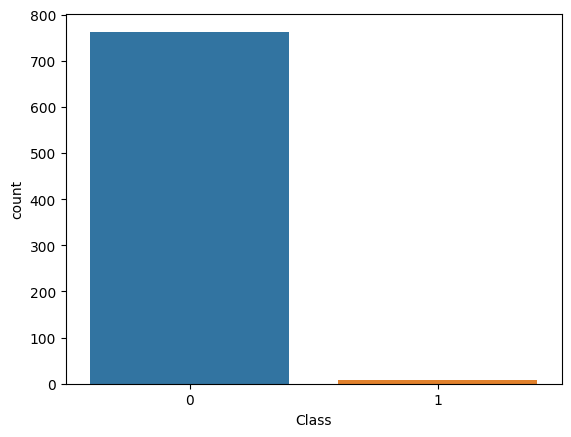

In [8]:
sns.countplot(data= df, x= 'Class')

In [9]:
df['Class'].value_counts()

0    763
1      9
Name: Class, dtype: int64

<Axes: xlabel='Class', ylabel='count'>

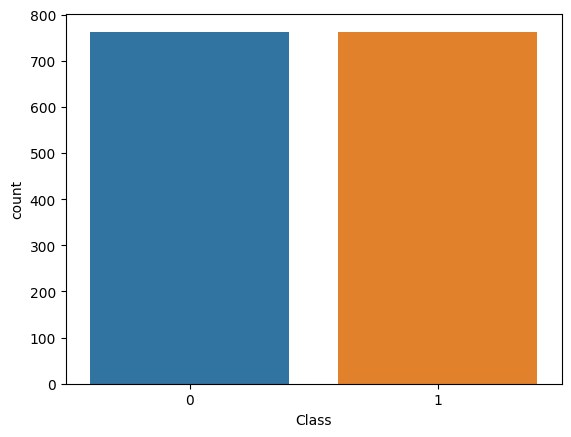

In [10]:
X= df.drop('Class',axis=1)
y= df['Class']

ros= RandomOverSampler(random_state=42)

X_resampled, y_resampled= ros.fit_resample(X,y)

resampled_df= pd.concat([pd.DataFrame(X_resampled,columns= X.columns), pd.Series(y_resampled,name= 'Class')], axis=1)

sns.countplot(data= resampled_df, x= 'Class')

In [11]:
resampled_df['Class'].value_counts()

0    763
1    763
Name: Class, dtype: int64

In [12]:
z= 1.96
p= 0.5
E= 0.05

In [13]:
sample_size= int(np.round((z**2 * p * (1-p)) / (E**2)))
sample_size

384

In [14]:
random_sample= resampled_df.sample(n= sample_size, replace= False).reset_index(drop= True)
random_sample.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,311,1.090349,-0.270146,1.235911,0.702071,-0.856229,0.485169,-0.804134,0.359130,0.673894,...,-0.011402,0.152461,0.046070,0.052707,0.149042,0.329248,0.028873,0.013954,11.50,0
1,112,-4.816022,-3.345061,0.566006,3.960568,-2.495400,3.691365,1.603360,-0.071801,1.092418,...,-0.797155,0.260093,-2.712276,-1.020436,0.070990,0.619086,1.720707,-1.648553,937.69,0
2,266,-2.564961,2.470985,2.649417,-1.564256,1.794297,-0.614742,4.185906,-3.855359,5.436633,...,-1.672706,-0.463149,-0.532466,0.306494,0.226844,-0.365416,-0.936735,-2.733887,10.35,0
3,414,-0.376162,0.460565,1.686273,1.300379,0.192393,0.205985,0.554367,0.095977,-0.210761,...,0.030858,0.301532,-0.072867,0.178562,-0.344148,-0.301681,-0.000071,-0.083202,29.99,0
4,560,-0.604303,0.919298,1.750526,0.436348,0.408253,-0.358939,0.682987,0.044293,-0.631069,...,-0.093374,-0.325679,-0.017841,0.024180,-0.204441,-0.645219,0.130324,0.126713,9.99,0


In [15]:
sample_size= len(resampled_df)//5
sample_size


305

In [16]:
k=5
indices= np.arange(0,len(resampled_df),k)[:sample_size]
systematic_sample= resampled_df.loc[indices].reset_index(drop= True)
systematic_sample.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,2,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
2,10,1.449044,-1.176339,0.913860,-1.375667,-1.971383,-0.629152,-1.423236,0.048456,-1.720408,...,-0.009302,0.313894,0.027740,0.500512,0.251367,-0.129478,0.042850,0.016253,7.80,0
3,12,-0.752417,0.345485,2.057323,-1.468643,-1.158394,-0.077850,-0.608581,0.003603,-0.436167,...,0.499625,1.353650,-0.256573,-0.065084,-0.039124,-0.087086,-0.180998,0.129394,15.99,0
4,16,0.694885,-1.361819,1.029221,0.834159,-1.191209,1.309109,-0.878586,0.445290,-0.446196,...,-0.295583,-0.571955,-0.050881,-0.304215,0.072001,-0.422234,0.086553,0.063499,231.71,0


In [17]:
z= 1.96
p= 0.7
E= 0.01
S= 2

In [18]:
sample_size= int(np.round((z**2 * p * (1-p)) / (E/S)**2))
sample_size

32269

In [19]:
stratified_sample= resampled_df.groupby(by= 'Class', group_keys= False).apply(lambda x: x.sample(n= sample_size//2, replace= True)).reset_index(drop= True)
stratified_sample.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,259,-0.942940,0.206074,1.625992,1.108392,0.875838,-1.215716,0.271173,-0.089238,-0.755539,...,0.150838,0.188497,-0.148637,0.407170,0.644707,-0.193470,-0.028920,0.005323,20.17,0
1,559,-1.859011,2.119134,-0.034073,0.099486,-1.046837,-1.210226,-0.433630,1.261116,-0.419833,...,-0.208054,-0.824565,0.142968,0.310899,-0.014682,0.089731,0.093360,0.008070,8.99,0
2,106,-0.306311,0.991272,1.414491,0.855244,0.334284,-0.728260,1.058823,-0.469840,-0.534718,...,0.128008,0.580329,-0.202141,0.416114,-0.271834,-0.377567,-0.113644,-0.052283,24.57,0
3,571,-2.990622,2.962638,-0.980844,0.071904,-1.795238,-1.335733,-1.143681,2.134599,-0.377240,...,-0.184759,-0.890628,0.278109,0.301391,0.137764,0.103233,0.052097,0.001938,9.99,0
4,48,-1.793406,1.854604,0.979514,1.112262,-0.206403,-0.199546,0.616642,0.064180,0.690272,...,-0.180723,0.235138,-0.091442,0.417654,0.122734,-0.232985,0.811880,0.618568,26.72,0


In [20]:
train_stratified_sample, test_stratified_sample= train_test_split(resampled_df, test_size= 0.3, stratify= resampled_df['Class'])

In [21]:
train_stratified_sample= train_stratified_sample.reset_index(drop= True)
test_stratified_sample= test_stratified_sample.reset_index(drop= True)

In [22]:
train_stratified_sample

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,472,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
1,164,0.073497,0.551033,0.451890,0.114964,0.822947,0.251480,0.296319,0.139497,-0.123050,...,-0.128758,-0.381932,0.151012,-1.363967,-1.389079,0.075412,0.231750,0.230171,0.99,1
2,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,1
3,290,-0.487234,0.505825,0.880670,0.972986,0.823367,0.287738,0.725039,0.021040,-0.268138,...,-0.052209,-0.129567,-0.177153,-1.004116,0.169317,-0.234252,0.129244,0.139251,67.36,0
4,44,-0.714764,0.514969,1.821676,0.616434,0.848776,-0.111938,1.505617,-0.798167,0.244757,...,-0.220075,-0.017845,-0.431938,-0.130458,0.337159,-0.440042,-0.674526,-0.473218,59.90,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,376,1.220896,0.116243,0.545205,0.838269,-0.491896,-0.691202,0.037916,-0.180524,0.348690,...,-0.219679,-0.426644,-0.001156,0.451173,0.477482,0.265557,-0.018555,0.015656,12.89,0
1064,404,0.638806,1.772451,-1.748258,1.297700,1.785872,-1.050197,1.485730,-0.780631,0.416991,...,-0.359613,-0.061540,-0.051428,-0.764738,-0.424181,-0.418629,-0.003258,-0.541237,0.99,0
1065,472,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
1066,484,-0.928088,0.398194,1.741131,0.182673,0.966387,-0.901004,0.879016,-0.156590,-0.142117,...,0.066353,0.281378,-0.257966,0.385384,0.391117,-0.453853,-0.104448,-0.125765,1.00,1


In [23]:
test_stratified_sample

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,1
1,423,1.161123,0.654050,0.211966,2.521864,0.156582,-0.583461,0.442847,-0.120914,-0.959401,...,0.025278,0.046085,-0.025789,0.377012,0.585970,0.080868,-0.028148,0.008323,3.75,0
2,83,-1.897331,0.955626,0.052543,1.276656,-3.323084,3.229911,1.029631,1.515607,-0.059627,...,0.128416,0.776078,0.477537,-0.608981,-1.120892,-0.413851,0.061399,-0.187964,552.18,0
3,406,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
4,56,0.086996,-0.051989,-0.497882,-3.151908,2.558400,2.796671,0.470283,0.265333,0.919513,...,-0.239426,-0.437342,0.018426,1.013038,-0.258927,-0.293189,-0.394956,-0.435996,10.84,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
453,118,1.254914,0.350287,0.302488,0.693114,-0.371470,-1.070256,0.086781,-0.202836,0.035154,...,-0.287592,-0.832682,0.128083,0.339427,0.215944,0.094704,-0.023354,0.030892,2.69,1
454,346,1.507578,-1.092820,0.360102,-1.770940,-0.913849,0.678723,-1.380228,0.147690,-1.970261,...,-0.047078,0.360796,-0.137631,-1.122472,0.438241,-0.022090,0.072569,0.003450,6.00,0
455,118,1.254914,0.350287,0.302488,0.693114,-0.371470,-1.070256,0.086781,-0.202836,0.035154,...,-0.287592,-0.832682,0.128083,0.339427,0.215944,0.094704,-0.023354,0.030892,2.69,1
456,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,1


In [24]:
X_test= test_stratified_sample.drop('Class',axis=1)
y_test= test_stratified_sample['Class']

In [25]:
z= 1.96
p= 0.5
E= 0.05
C= 50

In [26]:
sample_size= int(np.round((z**2 * p * (1-p)) / (E/C)**2))
sample_size

960400

In [27]:
clusters= [0,1]
sample_size= 500
cluster_sample= pd.DataFrame()

for cluster in clusters:
    cluster_df= resampled_df[resampled_df['Class']==cluster]
    sample= cluster_df.sample(n= sample_size)
    cluster_sample= pd.concat([cluster_sample,sample])

In [28]:
cluster_sample= cluster_sample.reset_index(drop= True)

In [29]:
cluster_sample

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,309,1.239526,0.602892,-0.257987,1.319581,-0.050805,-1.216528,0.235434,-0.192577,0.056127,...,-0.062742,-0.153895,-0.108973,0.246565,0.661412,-0.324202,0.025960,0.049254,1.00,0
1,282,0.057780,1.550356,-1.950408,2.041473,2.258426,4.692012,-2.303907,-4.492133,-2.013113,...,-2.477111,0.803886,0.284487,0.993049,-0.039252,0.173406,0.181840,0.378080,27.00,0
2,523,-0.421665,0.348353,1.750223,0.546512,0.461304,1.439793,0.452613,0.319216,-0.046137,...,-0.015406,0.378305,0.138206,-0.598534,-0.776517,0.526562,0.007711,-0.094513,42.64,0
3,56,-0.847998,1.043459,1.267369,1.135529,0.021362,0.336914,0.398480,0.317399,-0.028658,...,-0.024046,0.215006,-0.131982,-0.007416,-0.136578,-0.242961,0.382931,0.276417,20.22,0
4,449,-0.856525,0.583290,1.389014,-0.344699,0.267594,-0.951375,0.523117,-0.049229,-0.076944,...,-0.056911,-0.309940,0.167010,0.359246,-0.969651,-0.185793,-0.136897,0.233672,10.20,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,164,0.073497,0.551033,0.451890,0.114964,0.822947,0.251480,0.296319,0.139497,-0.123050,...,-0.128758,-0.381932,0.151012,-1.363967,-1.389079,0.075412,0.231750,0.230171,0.99,1
996,529,-2.000567,-2.495484,2.467149,1.140053,2.462010,0.594262,-2.110183,0.788347,0.958809,...,0.422452,1.195394,0.297836,-0.857105,-0.219322,0.861019,-0.124622,-0.171060,1.50,1
997,164,0.073497,0.551033,0.451890,0.114964,0.822947,0.251480,0.296319,0.139497,-0.123050,...,-0.128758,-0.381932,0.151012,-1.363967,-1.389079,0.075412,0.231750,0.230171,0.99,1
998,164,0.073497,0.551033,0.451890,0.114964,0.822947,0.251480,0.296319,0.139497,-0.123050,...,-0.128758,-0.381932,0.151012,-1.363967,-1.389079,0.075412,0.231750,0.230171,0.99,1


In [30]:
num_bootstrap_samples = 1

for _ in range(num_bootstrap_samples):
    bootstrap_sample = resampled_df.sample(n=len(resampled_df), replace=True)

In [31]:
bootstrap_sample= bootstrap_sample.reset_index(drop= True)

In [32]:
bootstrap_sample

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,68,1.232996,0.189454,0.491040,0.633673,-0.511574,-0.990609,0.066240,-0.196940,0.075921,...,-0.251566,-0.770139,0.125998,0.369627,0.205598,0.094062,-0.033138,0.020990,15.99,0
1,574,1.257719,0.364739,0.306923,0.690638,-0.357792,-1.067481,0.094272,-0.210300,0.014455,...,-0.286856,-0.820658,0.127663,0.343128,0.221120,0.094391,-0.022189,0.030944,1.29,1
2,574,1.257719,0.364739,0.306923,0.690638,-0.357792,-1.067481,0.094272,-0.210300,0.014455,...,-0.286856,-0.820658,0.127663,0.343128,0.221120,0.094391,-0.022189,0.030944,1.29,1
3,510,-2.149517,2.351164,0.992991,0.692643,0.231642,-0.020507,1.086606,-0.445825,1.880110,...,-0.469893,0.144643,-0.182027,0.061734,0.289830,-0.267337,0.875691,0.121175,1.99,0
4,164,0.073497,0.551033,0.451890,0.114964,0.822947,0.251480,0.296319,0.139497,-0.123050,...,-0.128758,-0.381932,0.151012,-1.363967,-1.389079,0.075412,0.231750,0.230171,0.99,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1521,409,1.243758,-0.777764,1.016830,-0.250546,-1.268555,0.137280,-1.057919,0.009986,-0.460486,...,-0.142455,0.042134,-0.125057,-0.403785,0.212596,0.619155,0.035518,0.041399,72.00,0
1522,118,1.254914,0.350287,0.302488,0.693114,-0.371470,-1.070256,0.086781,-0.202836,0.035154,...,-0.287592,-0.832682,0.128083,0.339427,0.215944,0.094704,-0.023354,0.030892,2.69,1
1523,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,1
1524,484,-0.928088,0.398194,1.741131,0.182673,0.966387,-0.901004,0.879016,-0.156590,-0.142117,...,0.066353,0.281378,-0.257966,0.385384,0.391117,-0.453853,-0.104448,-0.125765,1.00,1


In [33]:
lr_model= LogisticRegression(max_iter= 10000, solver= 'sag')
knn_model= KNeighborsClassifier(n_neighbors= 3)
rf_model= RandomForestClassifier()
sv_model= SVC(random_state=42)
xg_model= XGBClassifier(random_state=42)

In [34]:
models= [lr_model,knn_model,rf_model,sv_model,xg_model]
model_names= ['Logistic Regression','KNN','Random Forest','SVM','XGBOOST']

In [35]:
samples= [random_sample, systematic_sample, train_stratified_sample, cluster_sample, bootstrap_sample]
sample_names= ['Simple Random Sample', 'Systematic Sample', 'Stratified Sample', 'Cluster Sample', 'Bootstrap Sample']

In [36]:
test_samples= []

In [37]:
for sample in samples:
    scaler= StandardScaler()
    X_train= scaler.fit_transform(sample.drop('Class',axis=1))
    X_train= pd.DataFrame(X_train, columns= df.columns[:-1])
    sample= pd.concat([X_train,sample['Class']],axis=1)
    X_test= scaler.fit_transform(X_test)
    X_test= pd.DataFrame(X_test, columns= df.columns[:-1])
    test_samples.append(X_test)

In [38]:
accuracy_table= pd.DataFrame(index= model_names, columns= sample_names)

for i,model in enumerate(models):
    for j,sample in enumerate(samples):
        model.fit(sample.drop('Class',axis=1), sample['Class'])
        pred= model.predict(test_samples[j])
        accuracy_table.loc[model_names[i], sample_names[j]]= accuracy_score(y_test, pred)

In [41]:
accuracy_table

,Simple Random Sample,Systematic Sample,Stratified Sample,Cluster Sample,Bootstrap Sample
Logistic Regression,0.757642,0.657205,0.674672,0.670306,0.823144
KNN,0.5,0.5,0.5,0.5,0.5
Random Forest,0.5,0.558952,0.5,0.5,0.5
SVM,0.5,0.5,0.5,0.5,0.5
XGBOOST,0.615721,0.60917,0.659389,0.59607,0.617904
